In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
df_base_DC = pd.read_csv('training_DC.log')
df_base_120dogs = pd.read_csv('training_120dogs.log')

# NOT FREEZE: exp2, exp3, exp4
df_exp2 = pd.read_csv('exp2.log')
df_exp3 = pd.read_csv('exp3.log')
df_exp4 = pd.read_csv('exp4.log')

# FREEZE: exp2, exp3, exp4
df_exp2_freeze = pd.read_csv('exp2_freeze.log')
df_exp3_freeze = pd.read_csv('exp3_freeze.log')
df_exp4_freeze = pd.read_csv('exp4_freeze.log')


In [ ]:
print('dogs120-base', df_base_120dogs['val_acc'].max() / 100)

print('dogs-cats-base', df_base_DC['val_acc'].max())

print('exp2', df_exp2['val_acc'].max())
print('exp3', df_exp3['val_acc'].max())
print('exp4', df_exp4['val_acc'].max())

print('exp2_freeze', df_exp2_freeze['val_acc'].max())
print('exp3_freeze', df_exp3_freeze['val_acc'].max())
print('exp4_freeze', df_exp4_freeze['val_acc'].max())

dogs-cats-base 0.9105083346366882
dogs120-base 0.14069580078125
exp2 0.924391269683838
exp3 0.9179837703704834
exp4 0.9297308921813964
exp2_freeze 0.7637761831283569
exp3_freeze 0.8677915334701538
exp4_freeze 0.8964117765426636


In [13]:
print(r"""\begin{tabular}{|l|c|}
\hline
Experiment & Validation Accuracy \\
\hline""")

print(f"dogs-cats-base & {df_base_DC['val_acc'].max():.4f} \\\\")
print(f"dogs120-base & {df_base_120dogs['val_acc'].max() / 100:.4f} \\\\")

print(f"exp2 & {df_exp2['val_acc'].max():.4f} \\\\")
print(f"exp3 & {df_exp3['val_acc'].max():.4f} \\\\")
print(f"exp4 & {df_exp4['val_acc'].max():.4f} \\\\")

print(f"exp2\_freeze & {df_exp2_freeze['val_acc'].max():.4f} \\\\")
print(f"exp3\_freeze & {df_exp3_freeze['val_acc'].max():.4f} \\\\")
print(f"exp4\_freeze & {df_exp4_freeze['val_acc'].max():.4f} \\\\")

print(r"\hline")
print(r"\end{tabular}")


\begin{tabular}{|l|c|}
\hline
Experiment & Validation Accuracy \\
\hline
dogs-cats-base & 0.9105 \\
dogs120-base & 0.1407 \\
exp2 & 0.9244 \\
exp3 & 0.9180 \\
exp4 & 0.9297 \\
exp2\_freeze & 0.7638 \\
exp3\_freeze & 0.8678 \\
exp4\_freeze & 0.8964 \\
\hline
\end{tabular}


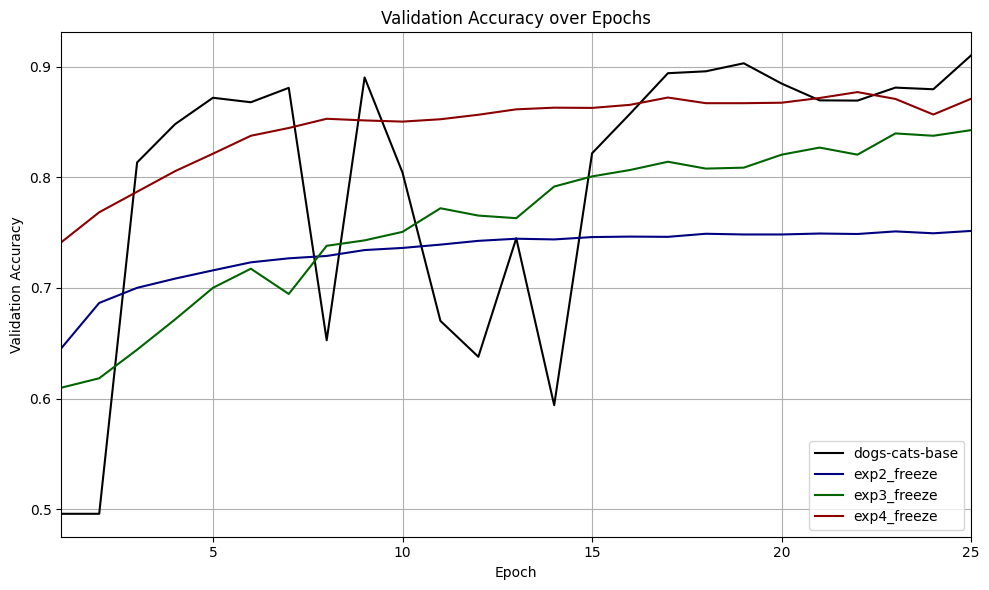

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(df_base_DC['epoch']+1, df_base_DC['val_acc'], label='dogs-cats-base', color='black')

y_axis_feature = 'val_acc'
plt.plot(df_exp2_freeze['epoch']+1, df_exp2_freeze[y_axis_feature], label='exp2_freeze', color='navy')

plt.plot(df_exp3_freeze['epoch']+1, df_exp3_freeze[y_axis_feature], label='exp3_freeze', color='darkgreen')

plt.plot(df_exp4_freeze['epoch']+1, df_exp4_freeze[y_axis_feature], label='exp4_freeze', color='darkred')

plt.xlabel('Epoch')
plt.xlim([1, 25])
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


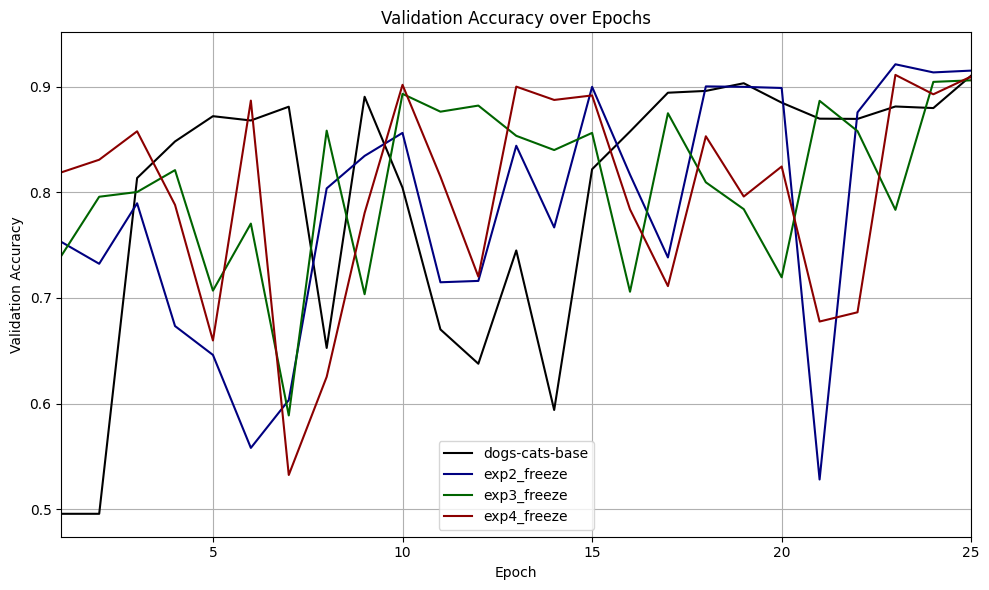

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(df_base_DC['epoch']+1, df_base_DC['val_acc'], label='dogs-cats-base', color='black')

y_axis_feature = 'val_acc'
plt.plot(df_exp2['epoch']+1, df_exp2[y_axis_feature], label='exp2', color='navy')
plt.plot(df_exp3['epoch']+1, df_exp3[y_axis_feature], label='exp3', color='darkgreen')
plt.plot(df_exp4['epoch']+1, df_exp4[y_axis_feature], label='exp4', color='darkred')

plt.xlabel('Epoch')
plt.xlim([1, 25])
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


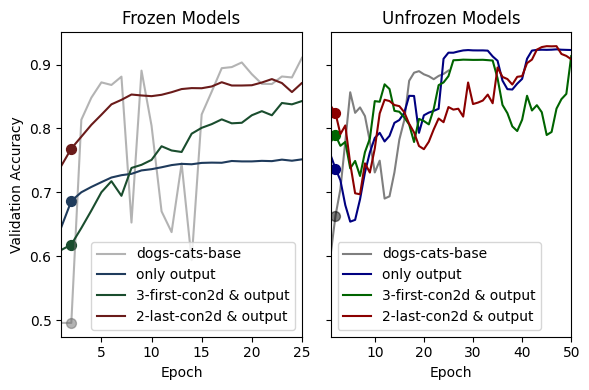

In [ ]:
def smooth_moving_avg(series, window=5):
    return series.rolling(window, center=True, min_periods=1).mean()

fig, axs = plt.subplots(1, 2, figsize=(6, 4), sharey=True)

y_axis_feature = 'val_acc'
point_nr = 1

# --- FROZEN
axs[0].plot(df_base_DC['epoch']+1, df_base_DC[y_axis_feature], label='dogs-cats-base', color='dimgray', alpha=0.5)
axs[0].scatter(df_base_DC['epoch'].iloc[point_nr]+1, df_base_DC[y_axis_feature].iloc[point_nr], color='dimgray', s=50, alpha=0.5)

axs[0].plot(df_exp2_freeze['epoch']+1, df_exp2_freeze[y_axis_feature], label='only output', color='#1f3b5c')
axs[0].scatter(df_exp2_freeze['epoch'].iloc[point_nr]+1, df_exp2_freeze[y_axis_feature].iloc[point_nr], color='#1f3b5c', s=50)

axs[0].plot(df_exp3_freeze['epoch']+1, df_exp3_freeze[y_axis_feature], label='3-first-conv2d & output', color='#1a4d2e')
axs[0].scatter(df_exp3_freeze['epoch'].iloc[point_nr]+1, df_exp3_freeze[y_axis_feature].iloc[point_nr], color='#1a4d2e', s=50)

axs[0].plot(df_exp4_freeze['epoch']+1, df_exp4_freeze[y_axis_feature], label='2-last-conv2d & output', color='#6a1b1a')
axs[0].scatter(df_exp4_freeze['epoch'].iloc[point_nr]+1, df_exp4_freeze[y_axis_feature].iloc[point_nr], color='#6a1b1a', s=50)

axs[0].set_title('Frozen Models')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Validation Accuracy')
axs[0].set_xlim([1, 25])
axs[0].grid(False)
axs[0].legend()

# --- UNFROZEN
axs[1].plot(df_base_DC['epoch']+1, smooth_moving_avg(df_base_DC[y_axis_feature]), label='dogs-cats-base', color='black', alpha=0.5)
axs[1].scatter(df_base_DC['epoch'].iloc[point_nr]+1, smooth_moving_avg(df_base_DC[y_axis_feature]).iloc[point_nr], color='black', s=50, alpha=0.5)

axs[1].plot(df_exp2['epoch']+1, smooth_moving_avg(df_exp2[y_axis_feature]), label='only output', color='navy')
axs[1].scatter(df_exp2['epoch'].iloc[point_nr]+1, smooth_moving_avg(df_exp2[y_axis_feature]).iloc[point_nr], color='navy', s=50)

axs[1].plot(df_exp3['epoch']+1, smooth_moving_avg(df_exp3[y_axis_feature]), label='3-first-conv2d & output', color='darkgreen')
axs[1].scatter(df_exp3['epoch'].iloc[point_nr]+1, smooth_moving_avg(df_exp3[y_axis_feature]).iloc[point_nr], color='darkgreen', s=50)

axs[1].plot(df_exp4['epoch']+1, smooth_moving_avg(df_exp4[y_axis_feature]), label='2-last-conv2d & output', color='darkred')
axs[1].scatter(df_exp4['epoch'].iloc[point_nr]+1, smooth_moving_avg(df_exp4[y_axis_feature]).iloc[point_nr], color='darkred', s=50)

axs[1].set_title('Unfrozen Models')
axs[1].set_xlabel('Epoch')
axs[1].set_xlim([1, 50])
axs[1].grid(False)
axs[1].legend()

plt.tight_layout()
plt.savefig('results.png', dpi=300)
plt.show()



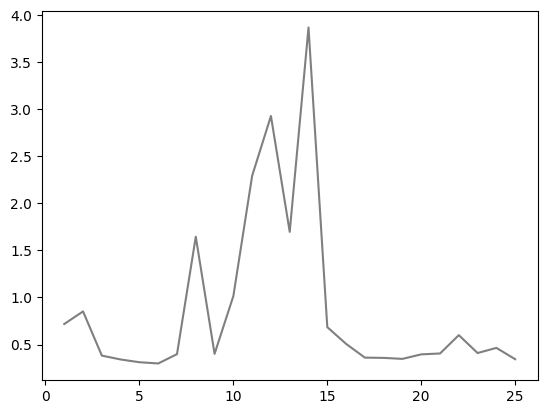

In [61]:
plt.plot(df_base_DC['epoch']+1, df_base_DC['val_loss'], label='dogs-cats-base', color='black', alpha=0.5)
